In [10]:
from typing import Callable, Dict, Iterable, Self
from numpy.typing import NDArray
import datasets
import tensorflow as tf
import numpy as np
import einops
import pandas as pd
import pickle
import sklearn.metrics as skm
import matplotlib.pyplot as plt

# import flagon

In [3]:
with open("data/solar_home_data.pkl", 'rb') as f:
    data = pickle.load(f)

def get_customer_data(customer=1):
    idx = np.arange(24, len(data[customer]))
    expanded_idx = np.array([np.arange(i - 24, i - 1) for i in idx])
    return data[customer][expanded_idx].reshape(len(data[customer]) - 24, -1), data[customer][idx, 0]

In [4]:
get_customer_data(1)[0].shape

(8736, 92)

In [30]:
def create_model() -> tf.keras.Model:
    inputs = tf.keras.Input((92))
    x = tf.keras.layers.Flatten()(inputs)
    # x = tf.keras.layers.Reshape((23, 4))(inputs)
    # x = tf.keras.layers.Conv1D(64, 5, activation="relu")(x)
    # x = tf.keras.layers.Conv1D(64, 3, activation="relu")(x)
    # x = tf.keras.layers.Conv1D(32, 2, activation="relu")(x)
    # x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(50, activation="relu")(x)
    x = tf.keras.layers.Dense(1, activation="linear")(x)
    model = tf.keras.Model(inputs=inputs, outputs=x)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        loss="mean_squared_error",
        metrics=["mean_absolute_error", tf.keras.metrics.RootMeanSquaredError()]
    )
    return model

In [6]:
X, Y = get_customer_data(1)

In [31]:
model = create_model()
model.fit(X, Y, epochs=5)

Epoch 1/5
273/273 [==============================] - 0s 542us/step - loss: 41.3683 - mean_absolute_error: 2.9371 - root_mean_squared_error: 6.4318
Epoch 2/5
273/273 [==============================] - 0s 529us/step - loss: 1.8761 - mean_absolute_error: 1.0362 - root_mean_squared_error: 1.3697
Epoch 3/5
273/273 [==============================] - 0s 526us/step - loss: 1.0108 - mean_absolute_error: 0.7639 - root_mean_squared_error: 1.0054
Epoch 4/5
273/273 [==============================] - 0s 531us/step - loss: 0.7289 - mean_absolute_error: 0.6456 - root_mean_squared_error: 0.8538
Epoch 5/5
273/273 [==============================] - 0s 532us/step - loss: 0.6336 - mean_absolute_error: 0.6015 - root_mean_squared_error: 0.7960


2/2 [==============================] - 0s 1ms/step


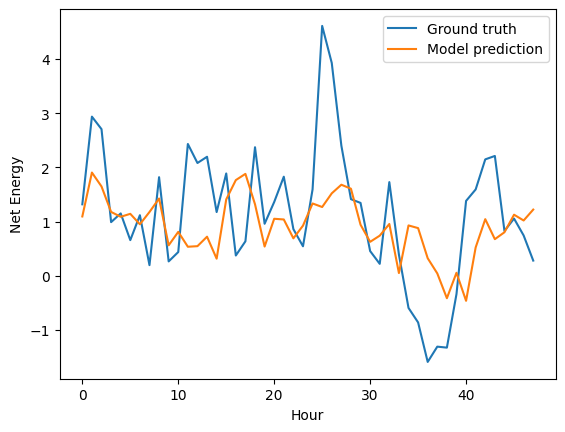

In [32]:
subset_Y = Y[:48]
plt.plot(np.arange(len(subset_Y)), subset_Y, '-', label="Ground truth")

preds = model.predict(X[:48])
plt.plot(np.arange(len(preds)), preds, '-', label="Model prediction")
plt.xlabel("Hour")
plt.ylabel("Net Energy")
plt.legend()
plt.show()